In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import requests

In [3]:
from pandas import json_normalize

pd_options = {
'display.max_rows'    : 500,
'display.max_columns' : 500,
'display.width'       : 1000,
}

[pd.set_option(option, setting) for option, setting in pd_options.items()]

[None, None, None]

In [4]:
#Import dataset BY MAJOR CITIES and view for analysis
data = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
print(data.columns)

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City', 'Country', 'Latitude', 'Longitude'], dtype='object')


In [5]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [6]:
data[["year",'month','day']] = data['dt'].str.split("-", expand=True)
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month,day
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,01,01
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,02,01
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,03,01
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,04,01
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,05,01


IN THIS PART I START CLEANING AND ORGANIZING MY DATASET

In [7]:
#Clean the dataset: for example there are some non-available values that I choose to drop
data = data.dropna()
data_no_duplicates = data.drop_duplicates(subset=['City','year'])
data_no_duplicates.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month,day
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,01,01
12,1850-01-01,25.803,1.943,Abidjan,Côte D'Ivoire,5.63N,3.23W,1850,01,01
24,1851-01-01,26.789,1.249,Abidjan,Côte D'Ivoire,5.63N,3.23W,1851,01,01
84,1856-01-01,26.689,1.270,Abidjan,Côte D'Ivoire,5.63N,3.23W,1856,01,01
96,1857-01-01,26.549,1.749,Abidjan,Côte D'Ivoire,5.63N,3.23W,1857,01,01


In [8]:
len(data_no_duplicates)

19202

In [9]:
specific_columns = ['dt', 'City', 'AverageTemperature', 'Latitude', 'Longitude','year' ]
selected_columns = data_no_duplicates[specific_columns]

data_no_duplicates.head(1000)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month,day
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,01,01
12,1850-01-01,25.803,1.943,Abidjan,Côte D'Ivoire,5.63N,3.23W,1850,01,01
24,1851-01-01,26.789,1.249,Abidjan,Côte D'Ivoire,5.63N,3.23W,1851,01,01
84,1856-01-01,26.689,1.270,Abidjan,Côte D'Ivoire,5.63N,3.23W,1856,01,01
96,1857-01-01,26.549,1.749,Abidjan,Côte D'Ivoire,5.63N,3.23W,1857,01,01
...,...,...,...,...,...,...,...,...,...,...
12841,1834-01-01,-1.196,2.122,Ankara,Turkey,39.38N,33.29E,1834,01,01
12853,1835-01-01,-0.609,2.226,Ankara,Turkey,39.38N,33.29E,1835,01,01
12865,1836-01-01,-4.110,1.937,Ankara,Turkey,39.38N,33.29E,1836,01,01
12877,1837-01-01,-0.647,2.707,Ankara,Turkey,39.38N,33.29E,1837,01,01


In [10]:
num_rows =  len(selected_columns)
print(num_rows)

19202


In [11]:
selected_columns.iloc[0:1000]

,dt,City,AverageTemperature,Latitude,Longitude,year
0,1849-01-01,Abidjan,26.704,5.63N,3.23W,1849
12,1850-01-01,Abidjan,25.803,5.63N,3.23W,1850
24,1851-01-01,Abidjan,26.789,5.63N,3.23W,1851
84,1856-01-01,Abidjan,26.689,5.63N,3.23W,1856
96,1857-01-01,Abidjan,26.549,5.63N,3.23W,1857
...,...,...,...,...,...,...
12841,1834-01-01,Ankara,-1.196,39.38N,33.29E,1834
12853,1835-01-01,Ankara,-0.609,39.38N,33.29E,1835
12865,1836-01-01,Ankara,-4.110,39.38N,33.29E,1836
12877,1837-01-01,Ankara,-0.647,39.38N,33.29E,1837


In [12]:
df = selected_columns

def convert_to_decimal(coord):
    direction = coord[-1]
    value = float(coord[:-1])
    if direction in ['S', 'W']:
        value = -value
    return value

# Apply conversion to 'Latitude' and 'Longitude' columns
df['Latitude'] = df['Latitude'].apply(convert_to_decimal)
df['Longitude'] = df['Longitude'].apply(convert_to_decimal)

print(df)

                dt     City  AverageTemperature  Latitude  Longitude  year
0       1849-01-01  Abidjan              26.704      5.63      -3.23  1849
12      1850-01-01  Abidjan              25.803      5.63      -3.23  1850
24      1851-01-01  Abidjan              26.789      5.63      -3.23  1851
84      1856-01-01  Abidjan              26.689      5.63      -3.23  1856
96      1857-01-01  Abidjan              26.549      5.63      -3.23  1857
...            ...      ...                 ...       ...        ...   ...
239120  2009-01-01     Xian              -1.516     34.56     108.97  2009
239132  2010-01-01     Xian              -0.237     34.56     108.97  2010
239144  2011-01-01     Xian              -4.811     34.56     108.97  2011
239156  2012-01-01     Xian              -2.416     34.56     108.97  2012
239168  2013-01-01     Xian              -1.635     34.56     108.97  2013

[19202 rows x 6 columns]


C:\Users\inase\AppData\Local\Temp\ipykernel_22864\1124404241.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'] = df['Latitude'].apply(convert_to_decimal)
C:\Users\inase\AppData\Local\Temp\ipykernel_22864\1124404241.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude'] = df['Longitude'].apply(convert_to_decimal)


In [13]:
df.head()

,dt,City,AverageTemperature,Latitude,Longitude,year
0,1849-01-01,Abidjan,26.704,5.63,-3.23,1849
12,1850-01-01,Abidjan,25.803,5.63,-3.23,1850
24,1851-01-01,Abidjan,26.789,5.63,-3.23,1851
84,1856-01-01,Abidjan,26.689,5.63,-3.23,1856
96,1857-01-01,Abidjan,26.549,5.63,-3.23,1857


In [14]:
df["year"] = df["year"].astype(int)

C:\Users\inase\AppData\Local\Temp\ipykernel_22864\1384140864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = df["year"].astype(int)


In [15]:
year_list = np.unique(df['year']).tolist()
year_list

[1743,
 1744,
 1745,
 1750,
 1751,
 1752,
 1753,
 1754,
 1755,
 1756,
 1757,
 1758,
 1759,
 1760,
 1761,
 1762,
 1763,
 1764,
 1765,
 1766,
 1767,
 1768,
 1769,
 1770,
 1771,
 1772,
 1773,
 1774,
 1775,
 1776,
 1777,
 1778,
 1779,
 1780,
 1781,
 1782,
 1783,
 1784,
 1785,
 1786,
 1787,
 1788,
 1789,
 1790,
 1791,
 1792,
 1793,
 1794,
 1795,
 1796,
 1797,
 1798,
 1799,
 1800,
 1801,
 1802,
 1803,
 1804,
 1805,
 1806,
 1807,
 1808,
 1809,
 1810,
 1811,
 1812,
 1813,
 1814,
 1815,
 1816,
 1817,
 1818,
 1819,
 1820,
 1821,
 1822,
 1823,
 1824,
 1825,
 1826,
 1827,
 1828,
 1829,
 1830,
 1831,
 1832,
 1833,
 1834,
 1835,
 1836,
 1837,
 1838,
 1839,
 1840,
 1841,
 1842,
 1843,
 1844,
 1845,
 1846,
 1847,
 1848,
 1849,
 1850,
 1851,
 1852,
 1853,
 1854,
 1855,
 1856,
 1857,
 1858,
 1859,
 1860,
 1861,
 1862,
 1863,
 1864,
 1865,
 1866,
 1867,
 1868,
 1869,
 1870,
 1871,
 1872,
 1873,
 1874,
 1875,
 1876,
 1877,
 1878,
 1879,
 1880,
 1881,
 1882,
 1883,
 1884,
 1885,
 1886,
 1887,
 1888,
 1889,

VISUALIZATION PART 
EXAMPLE 1: MAP BASED ON ONE YEAR: 2005

C:\Users\inase\AppData\Local\Temp\ipykernel_22864\2752693950.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['color'] = df1['AverageTemperature'].apply(assign_color)


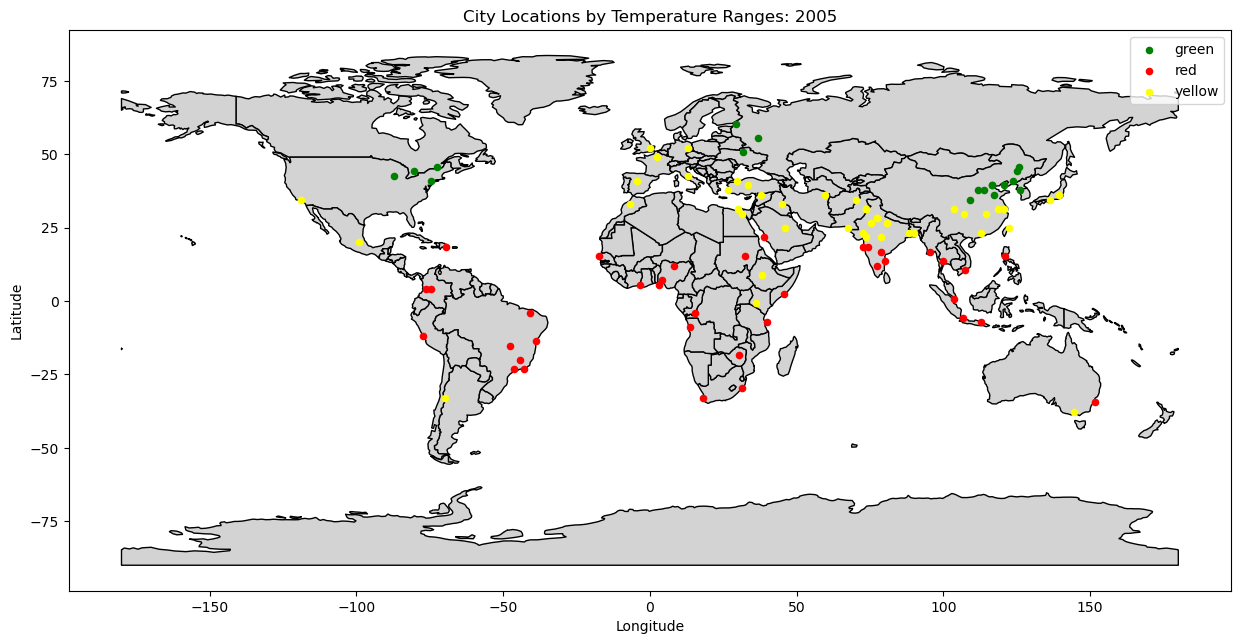

In [16]:
import geopandas as gpd
from shapely.geometry import Point

df1 = df[(df.year ==2005)]
# df1.head()

def assign_color(temp):
    if -40 < temp < -20:
        return 'blue'
    elif -20 < temp < 0:
        return 'green'
    elif 0 < temp < 20:
        return 'yellow'
    else:
        return 'red'

# Create a new column 'color' based on temperature ranges
df1['color'] = df1['AverageTemperature'].apply(assign_color)

# Create a GeoDataFrame using latitude, longitude, and the assigned color
geometry = [Point(xy) for xy in zip(df1['Longitude'], df1['Latitude'])]
gdf = gpd.GeoDataFrame(df1, geometry=geometry)

# Load a world map using GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
ax = world.plot(figsize=(15, 10), color='lightgrey', edgecolor='k')

# Plot city locations on the world map with different colors based on temperature ranges
for color, subset in gdf.groupby('color'):
    subset.plot(ax=ax, color=color, markersize=20, marker='o', label=color)

# Set title and labels
plt.title(f"City Locations by Temperature Ranges: {df1['year'].iloc[0]}")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()  # Show legend with colors

plt.show()

COMPARISON EXAMPLE:  YEAR 1743 THAT CAN BE COMPARED WITH A YEAR CHOSEN FROM THE WIDGET

C:\Users\inase\AppData\Local\Temp\ipykernel_22864\284726991.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['color'] = df_selected['AverageTemperature'].apply(assign_color)


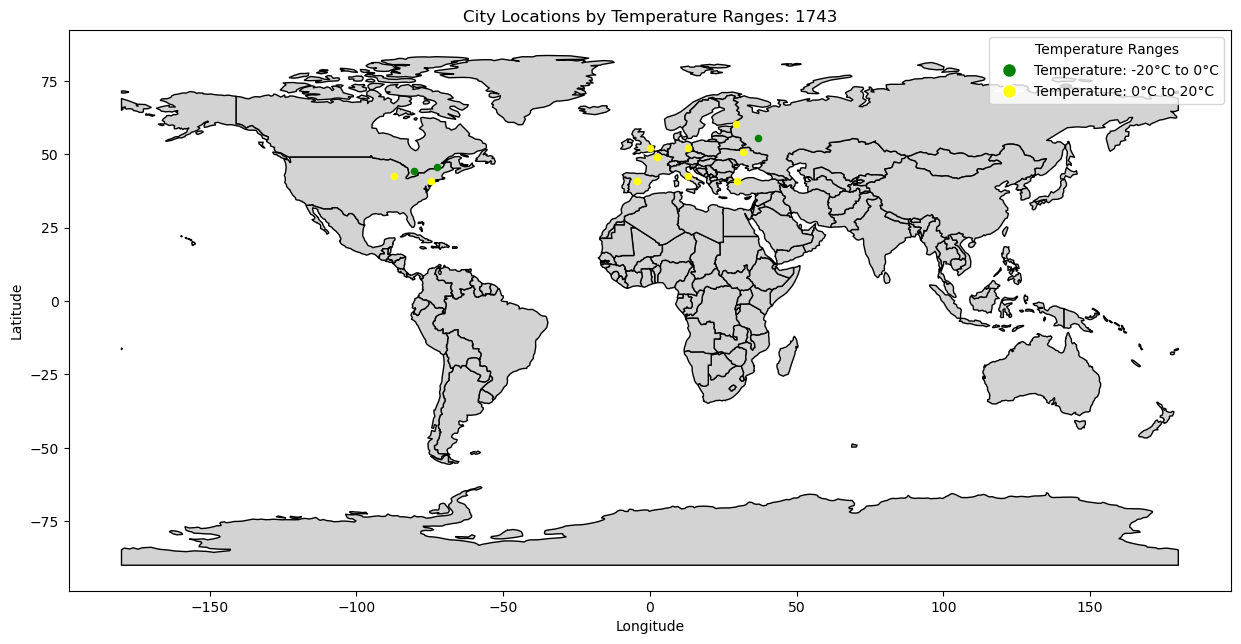

interactive(children=(Dropdown(description='Select Year:', options=(1743, 1744, 1745, 1750, 1751, 1752, 1753, …

In [17]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def assign_color(temp):
    if -40 < temp < -20:
        return 'blue'
    elif -20 < temp < 0:
        return 'green'
    elif 0 < temp < 20:
        return 'yellow'
    else:
        return 'red'

def plot_cities(selected_year):
    df_selected = df[df['year'] == selected_year]

    df_selected['color'] = df_selected['AverageTemperature'].apply(assign_color)

    geometry = [Point(xy) for xy in zip(df_selected['Longitude'], df_selected['Latitude'])]
    gdf = gpd.GeoDataFrame(df_selected, geometry=geometry)

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    fig, ax = plt.subplots(figsize=(15, 10))

    world.plot(ax=ax, color='lightgrey', edgecolor='k')

    # Create legend text based on temperature ranges
    legend_text = {
        'blue': 'Temperature: -40°C to -20°C',
        'green': 'Temperature: -20°C to 0°C',
        'yellow': 'Temperature: 0°C to 20°C',
        'red': 'Temperature: Above 20°C'
    }

    handles = []
    labels = []

    for color, subset in gdf.groupby('color'):
        handles.append(plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color))
        labels.append(legend_text[color])
        subset.plot(ax=ax, color=color, markersize=20, marker='o', label=color)

    plt.title(f"City Locations by Temperature Ranges: {selected_year}")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(handles, labels, title='Temperature Ranges')  # Show legend with colors and temperature ranges
    plt.show()

year_dropdown = widgets.Dropdown(
    options=year_list,
    value=min(year_list),
    description='Select Year:'
)

def update_map(year):
    display(plot_cities(year))

plot_cities(min(year_list))

interact = widgets.interactive(update_map, year=year_dropdown)
display(interact)
